<div class="alert alert-block alert-info">
    <h2>Exploring NBA Salaries: A Data Science and Predictive Analytics Approach</h2>
</div>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.impute import SimpleImputer

# Load data from the csvs
player_stats = pd.read_csv('NBA Player Stats(1950 - 2022).csv')
salaries = pd.read_csv('NBA Salaries(1990-2023).csv')

# Clean player names and standardize formatting in both datasets
player_stats['Player_clean'] = player_stats['Player'].str.lower().str.strip()
salaries['playerName_clean'] = salaries['playerName'].str.lower().str.strip()

player_stats['Season_clean'] = player_stats['Season'].astype(int)
salaries['seasonStartYear_clean'] = salaries['seasonStartYear'].astype(int)

# Perform a full outer join to merge both datasets on player names and seasons/years
merged_data = pd.merge(
    player_stats,
    salaries,
    left_on=['Player_clean', 'Season_clean'],
    right_on=['playerName_clean', 'seasonStartYear_clean'],
    how='outer'
)

print(merged_data)


       Unnamed: 0.1  Unnamed: 0_x  Season          Player Pos   Age   Tm  \
0            8385.0         117.0  1986.0      A.C. Green  PF  22.0  LAL   
1            8785.0         122.0  1987.0      A.C. Green  PF  23.0  LAL   
2            9188.0         131.0  1988.0      A.C. Green  PF  24.0  LAL   
3            9638.0         139.0  1989.0      A.C. Green  PF  25.0  LAL   
4           10101.0         147.0  1990.0      A.C. Green  PF  26.0  LAL   
...             ...           ...     ...             ...  ..   ...  ...   
33069       17622.0         453.0  2004.0  Željko Rebrača   C  31.0  TOT   
33070       17623.0         454.0  2004.0  Željko Rebrača   C  31.0  DET   
33071       17624.0         455.0  2004.0  Željko Rebrača   C  31.0  ATL   
33072       18223.0         447.0  2005.0  Željko Rebrača   C  32.0  LAC   
33073       18818.0         434.0  2006.0  Željko Rebrača   C  33.0  LAC   

          G    GS      MP  ...     PTS    Player_clean  Season_clean  \
0      82.0   1

In [2]:
df = merged_data

# Drop the Unnamed columns since they are just the id columns 
df = df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0_x', 'Unnamed: 0_y'], errors='ignore')

df

,Season,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,PF,PTS,Player_clean,Season_clean,playerName,seasonStartYear,salary,inflationAdjSalary,playerName_clean,seasonStartYear_clean
0,1986.0,A.C. Green,PF,22.0,LAL,82.0,1.0,1542.0,209.0,388.0,...,229.0,521.0,a.c. green,1986.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1987.0,A.C. Green,PF,23.0,LAL,79.0,72.0,2240.0,316.0,587.0,...,171.0,852.0,a.c. green,1987.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1988.0,A.C. Green,PF,24.0,LAL,82.0,64.0,2636.0,322.0,640.0,...,204.0,937.0,a.c. green,1988.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1989.0,A.C. Green,PF,25.0,LAL,82.0,82.0,2510.0,401.0,758.0,...,172.0,1088.0,a.c. green,1989.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1990.0,A.C. Green,PF,26.0,LAL,82.0,82.0,2709.0,385.0,806.0,...,207.0,1061.0,a.c. green,1990.0,A.C. Green,1990.0,"$1,750,000","$3,991,872",a.c. green,1990.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33069,2004.0,Željko Rebrača,C,31.0,TOT,24.0,2.0,273.0,34.0,77.0,...,52.0,91.0,željko rebrača,2004.0,NaN,NaN,NaN,NaN,NaN,NaN
33070,2004.0,Željko Rebrača,C,31.0,DET,21.0,2.0,222.0,22.0,54.0,...,45.0,66.0,željko rebrača,2004.0,NaN,NaN,NaN,NaN,NaN,NaN
33071,2004.0,Željko Rebrača,C,31.0,ATL,3.0,0.0,51.0,12.0,23.0,...,7.0,25.0,željko rebrača,2004.0,NaN,NaN,NaN,NaN,NaN,NaN
33072,2005.0,Željko Rebrača,C,32.0,LAC,58.0,2.0,928.0,133.0,234.0,...,130.0,339.0,željko rebrača,2005.0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:

df.columns

# Columns and their descriptions

# Index: A sequential number assigned to each row, starting from 1.
# Season: The starting year of the NBA season.
# Player: Player's name.
# Pos: Player's position (e.g., G for Guard, F for Forward, C for Center).
# Age: Player's age during the season.
# Tm: Team abbreviation (e.g., LAL for Los Angeles Lakers).
# G: Games played by the player during the season.
# GS: Games started by the player during the season.
# MP: Total minutes played by the player.

# FG: Field goals made (total baskets scored except free throws).
# FGA: Field goals attempted.
# FG%: Field goal percentage (FG / FGA).
# 3P: 3-point shots made.
# 3PA: 3-point shots attempted.
# 3P%: 3-point shooting percentage (3P / 3PA).
# 2P: 2-point shots made.
# 2PA: 2-point shots attempted.
# 2P%: 2-point shooting percentage (2P / 2PA).
# eFG%: Effective field goal percentage, accounting for the added value of 3-pointers.

# FT: Free throws made.
# FTA: Free throws attempted.
# FT%: Free throw percentage (FT / FTA).

# ORB: Offensive rebounds.
# DRB: Defensive rebounds.
# TRB: Total rebounds (ORB + DRB).
# AST: Assists made by the player.
# STL: Steals made by the player.
# BLK: Blocks made by the player.
# TOV: Turnovers (times the player lost possession).
# PF: Personal fouls committed.
# PTS: Total points scored by the player during the season.

# Player_clean: A cleaned version of the Player column (lowercase, stripped of spaces).
# Season_clean: A cleaned version of the Season column.
# playerName: Player's name from the salaries dataset.
# seasonStartYear: Starting year of the NBA season from the salaries dataset.
# salary: Player's salary for the season.
# inflationAdjSalary: Player's salary adjusted for inflation.
# playerName_clean: A cleaned version of the playerName column.
# seasonStartYear_clean: A cleaned version of the seasonStartYear column.

Index(['Season', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'Player_clean', 'Season_clean', 'playerName', 'seasonStartYear',
       'salary', 'inflationAdjSalary', 'playerName_clean',
       'seasonStartYear_clean'],
      dtype='object')

In [4]:
# We drop inflationAdjSalary since having it pairs with the salary column --> salary is more relevant here
# The inflationAdjSalary column is likely derived from the salary column (adjusted for inflation).
# Including both columns could lead to multicollinearity and redundancy in model

df.drop(columns=['inflationAdjSalary'], inplace=True)


In [5]:
#Missing and Null value analysis 

missing_summary = pd.DataFrame({
    'Missing Count': df.isnull().sum(),
    'Missing Percent': (df.isnull().sum() / len(df)) * 100
}).sort_values(by='Missing Percent', ascending=False)

print(missing_summary)

                       Missing Count  Missing Percent
seasonStartYear_clean          14826        44.826752
playerName_clean               14826        44.826752
salary                         14826        44.826752
seasonStartYear                14826        44.826752
playerName                     14826        44.826752
3P%                            13866        41.924170
GS                             10721        32.415190
3P                             10074        30.458971
3PA                            10074        30.458971
TOV                             9356        28.288081
STL                             8204        24.804983
BLK                             8204        24.804983
ORB                             8204        24.804983
DRB                             8204        24.804983
FT%                             5439        16.444942
MP                              4805        14.528028
TRB                             4616        13.956582
2P%                         

In [6]:
#DATA CLEANING:

# Drop irrelevant columns
# These columns were used for merging and are duplicates of existing info.
df = df.drop(columns=['Player_clean', 'Season_clean', 'playerName_clean', 'seasonStartYear_clean'], errors='ignore')

# Drop columns with more than 80% missing values --> they dont tell us much about player stats and they aren't helpful in predicting salary 
threshold = 0.8
df = df.loc[:, df.isnull().mean() < threshold]

# Clean salary column to just have numbers 
# Remove dollar signs and commas & convert to numeric
df['salary'] = df['salary'].replace(r'[\$,]', '', regex=True).astype(float)

# Handle missing values for salary
# Impute missing salaries using the median salary grouped by Team and Season Year --> this is pretty unbiased
df['salary'] = df.groupby(['Tm', 'seasonStartYear'])['salary'].transform(lambda x: x.fillna(x.median()))

# If any salary values are still missing, fill with 0
df['salary'] = df['salary'].fillna(0)

# Drop rows where season Year or Player is missing --> this information is essential in predicting salaries since withouth the player and their season info are important
df = df.dropna(subset=['Player', 'seasonStartYear'])

# Impute missing values for positions and teams with the mode / Unknown placeholder.
df['Pos'] = df['Pos'].fillna(df['Pos'].mode()[0])  # Fill with the most frequent value
df['Tm'] = df['Tm'].fillna('Unknown')  # Assign 'Unknown' to missing team data

# Impute the missing values for numerical columns by using the median --> median is not as affected by extreme values as mean & so this ensures that the imputed values are more representative of the typical data
num_columns = ['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
               '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
               'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']
for col in num_columns:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

In [7]:
df.isnull().sum()

Season             0
Player             0
Pos                0
Age                0
Tm                 0
G                  0
GS                 0
MP                 0
FG                 0
FGA                0
FG%                0
3P                 0
3PA                0
3P%                0
2P                 0
2PA                0
2P%                0
eFG%               0
FT                 0
FTA                0
FT%                0
ORB                0
DRB                0
TRB                0
AST                0
STL                0
BLK                0
TOV                0
PF                 0
PTS                0
playerName         0
seasonStartYear    0
salary             0
dtype: int64

In [8]:
from scipy import stats

# CHECK FOR OUTLIERS

# Numerical columns to check for outliers
columns_to_check = [
    'PTS', 'AST', 'TRB', 'STL', 'BLK', 'MP', 'G', 'GS', 'FG', 'FGA', 'FG%', 
    '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 
    'DRB', 'TOV', 'PF', 'Age'
]

outliers_indices = set()

for column in columns_to_check:
    # Calculate Z-scores
    z_scores = stats.zscore(df[column].dropna())
    
    # Identify outliers (Z-score > 4 or < -4) --> we use threshold of 4 for more strict outlier checking 
    column_outliers = df[np.abs(z_scores) > 4].index
    outliers_indices.update(column_outliers) 
    

# Calculate total number of unique outliers and percentage
total_outliers = len(outliers_indices)
percentage_outliers = (total_outliers / len(df)) * 100

print(f"\nTotal number of unique outliers: {total_outliers}")
print(f"Percentage of data containing outliers: {percentage_outliers:.2f}%")



Total number of unique outliers: 832
Percentage of data containing outliers: 5.97%


In [9]:
# Remove the outliers from the dataset
df = df.drop(outliers_indices, axis=0)
print(f"\nData size after removing the outliers: {len(df)}")



Data size after removing the outliers: 13112


In [10]:
df.columns

Index(['Season', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'playerName', 'seasonStartYear', 'salary'],
      dtype='object')

In [11]:
#FEATURE ENGINEERING (we base these on actual NBA calculation formulas for some of these advanced stats)

# Convert relevant columns to integers for mathematical operations
int_columns = ['PTS', 'TRB', 'AST', 'STL', 'BLK', 'FGA', 'FG', 'FTA', 'FT', 'GS', 'G']
for col in int_columns:
    df[col] = df[col].fillna(0).astype(int)

# Calculate Weighted Efficiency (WEFF) using a formula that evaluates overall player performance:
# - Rewards positive contributions such as points scored (PTS), assists (AST), rebounds (TRB), steals (STL), and blocks (BLK).
# - Penalizes inefficiencies like missed field goals (FGA - FG) and missed free throws (FTA - FT).
# - Subtracts turnovers (TOV) as a negative contribution.
# - Normalizes the result by dividing the total by the number of games played (G).
df['WEFF'] = ((2 * df['PTS'] + 1.5 * df['AST'] + 1.2 * df['TRB'] + 
               df['STL'] + df['BLK'] - 0.5 * (df['FGA'] - df['FG']) - 
               0.5 * (df['FTA'] - df['FT']) - df['TOV']) / df['G'])

# Handle infinite and missing values
df['WEFF'] = df['WEFF'].replace([np.inf, -np.inf], np.nan)
df['WEFF'] = df['WEFF'].fillna(0).round(2) 

# Calculate Points Per Game (PPG)
df['PPG'] = (df['PTS'] / df['G']).fillna(0).round(2)

# Calculate Assists Per Game (APG)
df['APG'] = (df['AST'] / df['G']).fillna(0).round(2)

# Calculate Rebounds Per Game (RPG)
df['RPG'] = (df['TRB'] / df['G']).fillna(0).round(2)

# Calculate Steals Per Game (SPG)
df['SPG'] = (df['STL'] / df['G']).fillna(0).round(2)

# Calculate Blocks Per Game (BPG)
df['BPG'] = (df['BLK'] / df['G']).fillna(0).round(2)

# Calculate Turnovers Per Game (TPG)
df['TPG'] = (df['TOV'] / df['G']).fillna(0).round(2)

# Calculate Individual Usage Rate (estimate based on FGA, FTA, and TOV)
df['UsageRate'] = ((df['FGA'] + 0.44 * df['FTA'] + df['TOV']) / df['MP']).fillna(0).round(2)

# Calculate Shooting Efficiency (Field Goal % weighted with Effective Field Goal %)
df['ShootingEfficiency'] = ((df['FG%'] + df['eFG%']) / 2).fillna(0).round(2)

# Calculate Offensive Contribution (Weighted Points + Assists + Offensive Rebounds)
df['OffensiveContribution'] = (df['PTS'] + 1.5 * df['AST'] + df['ORB']).fillna(0).round(2)

# Calculate Defensive Contribution (Defensive Rebounds + Steals + Blocks)
df['DefensiveContribution'] = (df['DRB'] + df['STL'] + df['BLK']).fillna(0).round(2)

# Calculate Experience --> estimates the number of years a player has been professionally active (Assumes players start their professional careers at 19 years old)
df['Experience'] = (df['seasonStartYear'] - (df['seasonStartYear'] - (df['Age'] - 19))).fillna(0).round(2)

# Calculate Games Started Percentage (Games Started / Games Played)
df['GS%'] = (df['GS'] / df['G']).replace([np.inf, -np.inf], np.nan).fillna(0).round(2)

# Calculate Impact Score (Weighted Efficiency per Minute Played)
df['ImpactScore'] = (df['WEFF'] / df['MP']).replace([np.inf, -np.inf], np.nan).fillna(0).round(2)

# Calculate Minutes Played per Game (MPG)
df['MPG'] = (df['MP']/df['G']).fillna(0).round(2)

In [12]:
# dataframe with the added feature engineered columns
df

,Season,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,BPG,TPG,UsageRate,ShootingEfficiency,OffensiveContribution,DefensiveContribution,Experience,GS%,ImpactScore,MPG
4,1990.0,A.C. Green,PF,26.0,LAL,82,82,2709.0,385,806,...,0.61,1.41,0.40,0.24,1458.0,566.0,7.0,1.00,0.01,33.04
5,1991.0,A.C. Green,PF,27.0,LAL,82,21,2164.0,258,542,...,0.28,1.21,0.36,0.31,1057.5,397.0,8.0,0.26,0.01,26.39
6,1992.0,A.C. Green,PF,28.0,LAL,82,53,2902.0,382,803,...,0.44,1.35,0.38,0.29,1597.5,583.0,9.0,0.65,0.01,35.39
7,1993.0,A.C. Green,PF,29.0,LAL,82,55,2819.0,379,706,...,0.48,1.41,0.35,0.33,1512.0,551.0,10.0,0.67,0.01,34.38
8,1994.0,A.C. Green,PF,30.0,PHO,82,55,2825.0,465,926,...,0.46,1.22,0.42,0.37,1684.5,586.0,11.0,0.67,0.01,34.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33016,2007.0,Zydrunas Ilgauskas,C,31.0,CLE,78,78,2130.0,385,793,...,1.26,1.81,0.48,0.33,1351.5,503.0,12.0,1.00,0.02,27.31
33017,2008.0,Zydrunas Ilgauskas,C,32.0,CLE,73,73,2222.0,417,879,...,1.64,1.85,0.50,0.31,1448.0,573.0,13.0,1.00,0.02,30.44
33018,2009.0,Zydrunas Ilgauskas,C,33.0,CLE,65,65,1765.0,342,724,...,1.29,1.38,0.50,0.38,1091.0,445.0,14.0,1.00,0.02,27.15
33019,2010.0,Zydrunas Ilgauskas,C,34.0,CLE,64,6,1339.0,194,438,...,0.78,0.98,0.41,0.22,660.0,295.0,15.0,0.09,0.02,20.92


In [ ]:
#DATA VISUALIZATION and analysis


# Scatter Plot: Weighted Efficiency (WEFF) vs Salary
plt.figure(figsize=(12, 8))
plt.scatter(df['WEFF'], df['salary'], alpha=0.6, color='blue')
plt.title('Scatter Plot: WEFF vs Salary')
plt.xlabel('Weighted Efficiency (WEFF)')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

# Scatter Plot: Points Per Game (PPG) vs Salary
df['PPG'] = (df['PTS'] / df['G']).fillna(0).round(2)
plt.figure(figsize=(12, 8))
plt.scatter(df['PPG'], df['salary'], alpha=0.6, color='green')
plt.title('Scatter Plot: Points Per Game (PPG) vs Salary')
plt.xlabel('Points Per Game (PPG)')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

# Box Plot: Salary Distribution by Position
plt.figure(figsize=(12, 8))
sns.boxplot(x='Pos', y='salary', data=df)
plt.title('Salary Distribution by Position')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.grid(True)
plt.show()


# Bar Plot: Average Salary by Team
avg_salary_team = df.groupby('Tm')['salary'].mean().reset_index().sort_values('salary', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(y='Tm', x='salary', data=avg_salary_team, hue='Tm', dodge=False, palette='magma')
plt.title('Average Salary by Team')
plt.xlabel('Salary')
plt.ylabel('Team')
plt.show()


#For the scatterplots, there is a trend where players with higher WEFF / PPG generally tend to have higher salaries, though there’s significant variance. But alone, they arent the sole determinants 
#So we will use these variables combined with other metrics like WEFF, PPG, RPG, and team to create a multivariate model

# Salary distribution by position highlights which positions tend to earn higher median salaries. Even with variation, certain non-hybrid positions (e.g., PG, C) have more high-salary outliers beyond the third quartile, 
#indicating that these roles tend to have elite players earning significantly more than the median.

# Average salary by team shows how different teams have different standards when assigning salaries. So, including Team as a categorical variable in the prediction model can provide valuable information.



Salary Trends by WEFF Ranges:
  WEFFRange        salary       WEFF  PlayerCount
0        <0  5.620562e+05  -0.073333           15
1      0-10  1.431543e+06   6.634591         2468
2     10-20  2.473275e+06  14.901206         3998
3     20-30  4.307777e+06  24.557356         3113
4     30-40  6.807879e+06  34.476069         1984
5     40-50  9.573052e+06  44.405837         1057
6       >50  1.593894e+07  56.164969          477


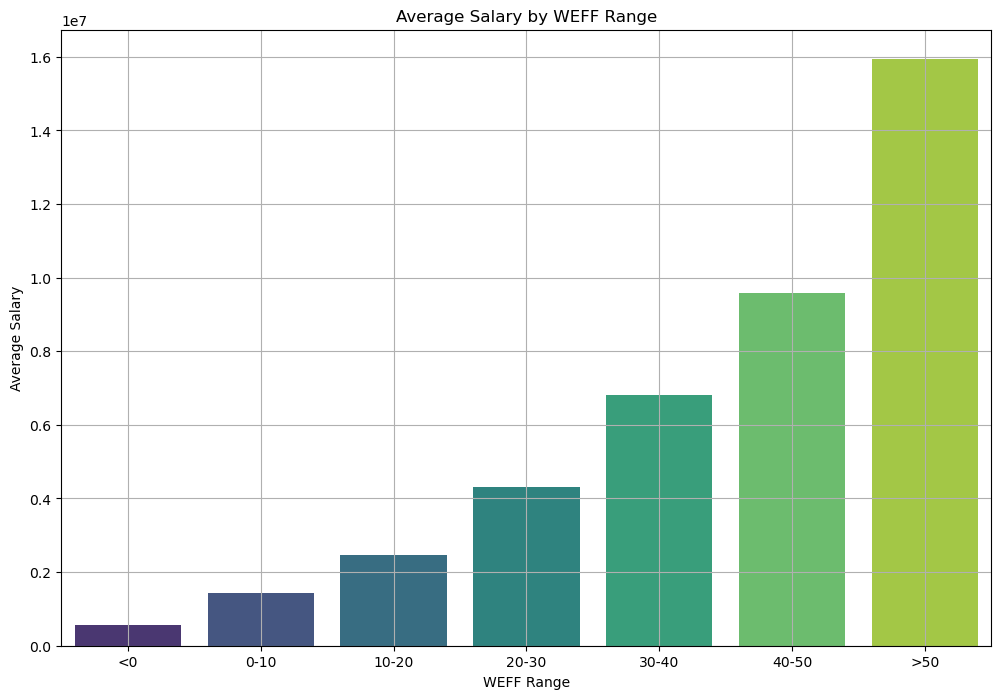

In [14]:
# Explore aggregated insights into how salary trends vary by WEFF ranges

# Divide WEFF into meaningful ranges
df['WEFFRange'] = pd.cut(df['WEFF'], bins=[-10, 0, 10, 20, 30, 40, 50, 100], 
                         labels=['<0', '0-10', '10-20', '20-30', '30-40', '40-50', '>50'])

## Group data by WEFFRange and calculate aggregated statistics
weff_salary_analysis = df.groupby('WEFFRange', observed=False, as_index=False).agg({'salary': 'mean', 'WEFF': 'mean', 'Player': 'count'})
weff_salary_analysis.rename(columns={'Player': 'PlayerCount'}, inplace=True)
print("Salary Trends by WEFF Ranges:")
print(weff_salary_analysis)

# Visualize Average Salary by WEFF Range
plt.figure(figsize=(12, 8))
sns.barplot(x='WEFFRange', y='salary', hue='WEFFRange', dodge=False, data=weff_salary_analysis, palette='viridis', legend=False)
plt.title('Average Salary by WEFF Range')
plt.xlabel('WEFF Range')
plt.ylabel('Average Salary')
plt.grid(True)
plt.show()

# - The visualization shows that as WEFF (Weighted Efficiency) increases, the average salary also increases significantly.
# - Players with WEFF in the highest range (>50) earn the highest average salary (~$12 million), confirming that elite performance levels are highly valued in terms of salary.
# - Most players fall within the 0-10 and 10-20 WEFF ranges, indicating that mid-range efficiency is the norm for most players.
# - The visualization highlights how salary progressively scales with WEFF, with noticeable jumps between ranges, especially in the higher efficiency ranges (30-40, 40-50, >50).

# - This means categorizing WEFF into ranges can provide additional insights into player value and performance tiers

In [15]:
df.columns

Index(['Season', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'playerName', 'seasonStartYear', 'salary', 'WEFF', 'PPG', 'APG', 'RPG',
       'SPG', 'BPG', 'TPG', 'UsageRate', 'ShootingEfficiency',
       'OffensiveContribution', 'DefensiveContribution', 'Experience', 'GS%',
       'ImpactScore', 'MPG', 'WEFFRange'],
      dtype='object')

In [16]:
# INITIAL MODEL:

# Select relevant features for salary prediction
# The features below include both raw metrics and engineered features
features = [
    'PTS', 'AST', 'TRB', 'STL', 'BLK', 'TOV', 'FGA', 'FG', 'FTA', 'FT', 
    'G', 'GS', 'MP', 'WEFF', 'PPG', 'APG', 'RPG', 'SPG', 'BPG', 'TPG',
    'UsageRate', 'ShootingEfficiency', 'OffensiveContribution', 'DefensiveContribution', 
    'Age', 'Experience', 'GS%', 'ImpactScore', 'Pos', 'PF', 'ORB', '3PA', '3P%',
    '2PA', '2P%', 'FT%', 'DRB', '2P'
]

target = 'salary'

X = df[features]
y = df[target]

# Encode categorical variable ('Pos') using one-hot encoding
all_categories = df['Pos'].unique()  # Get all unique categories of 'Pos'

# Preprocessor encodes 'Pos' (player position) while leaving other numeric features
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(categories=[all_categories], handle_unknown='ignore', drop='first'), ['Pos'])  
    ],
    remainder='passthrough' 
)

# Splits the data into training and testing sets to evaluate model performance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Pipeline with Preprocessing and Linear Regression
# Combines preprocessing (one-hot encoding) and the linear regression model in a single pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fits the pipeline to the training data
model_pipeline.fit(X_train, y_train)

# Predicts salaries on the test set and evaluates the model using MSE and R-squared
y_pred = model_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred) 

print(f"Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# Resulted in low R^2 --> a simple regression model does not capture the complex and maybe non-linear relationships between features and salary 

Model Performance:
Mean Squared Error (MSE): 11951930934673.61
R-squared (R²): 0.60


In [ ]:
# Create more visualizations to find meaningful features and patterns for predicting salary

#Average Salary Over Time
avg_salary_by_season = df.groupby('Season')['salary'].mean()

# Line Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=avg_salary_by_season.index, y=avg_salary_by_season.values, marker='o')
plt.title('Average Salary Over Seasons', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average Salary', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# This plot shows the trend of average NBA player salaries over seasons.
# - Salaries steadily increased from 1990 to 2015, reflecting the NBA's growing revenue and popularity.
# - Around 2014, there was a period of stagnation in salary growth, likely due to the salary cap constraints before the massive TV rights deal signed in 2014 (effective in 2016).
# - A sharp spike in 2016 corresponds to the new TV rights deal, which significantly increased the salary cap.
# - Post-2020, salaries show slight stagnation or decline, likely influenced by the financial impacts of the COVID-19 pandemic.
# This highlights how external factors, such as league revenue and salary cap adjustments, directly impact player salaries.
# So, season is important factor in predicting salary 


In [ ]:

# Box Plot: Salary by Team
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Tm', y='salary', palette='cool', hue='Tm')
plt.title('Salary Distribution by Team', fontsize=16)
plt.xlabel('Team', fontsize=12)
plt.ylabel('Salary', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# This visualization helps by showing the salary distribution across different teams, highlighting variations in team spending habits. 
# It reveals which teams have more consistent salary structures versus those with large disparities, likely due to a few superstar contracts. 
# This insight emphasizes the importance of including the team (Tm) as a feature in the salary prediction model, as team-level factors significantly influence player salaries. 

# For example, BRK (Brooklyn Nets) shows large disparities in salary distribution, with a wide IQR, indicating significant salary for superstar players.

In [ ]:
#Scatterplots for all the metrics vs salary 

import matplotlib.pyplot as plt
int_columns = ['Season', 'Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 
 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
 'salary', 'WEFF', 'PPG', 'APG', 'RPG', 'SPG', 'BPG', 'TPG', 'UsageRate', 'ShootingEfficiency', 
 'OffensiveContribution', 'DefensiveContribution', 'Experience', 'GS%', 'ImpactScore', 'MPG']

plots_per_row = 4
total_plots = len(int_columns)
rows = (total_plots // plots_per_row) + (total_plots % plots_per_row > 0)

fig, axes = plt.subplots(rows, plots_per_row, figsize=(16, rows * 4))
axes = axes.flatten()

for idx, column in enumerate(int_columns):
    axes[idx].scatter(df[column], df['salary'], alpha=0.5)
    axes[idx].set_title(f'Salary vs {column}')
    axes[idx].set_xlabel(column)
    axes[idx].set_ylabel('Salary')
    axes[idx].grid(True)
for ax in axes[total_plots:]:
    ax.axis('off')
plt.tight_layout()
plt.show()

#From these graphs we see the most important trends and graphs are Season, Age, G, FG%, 3P%,  eFG%, FT%, WEFF, PPG, APG, PTS, TPG, UsageRate, ShootingEfficency, MPG


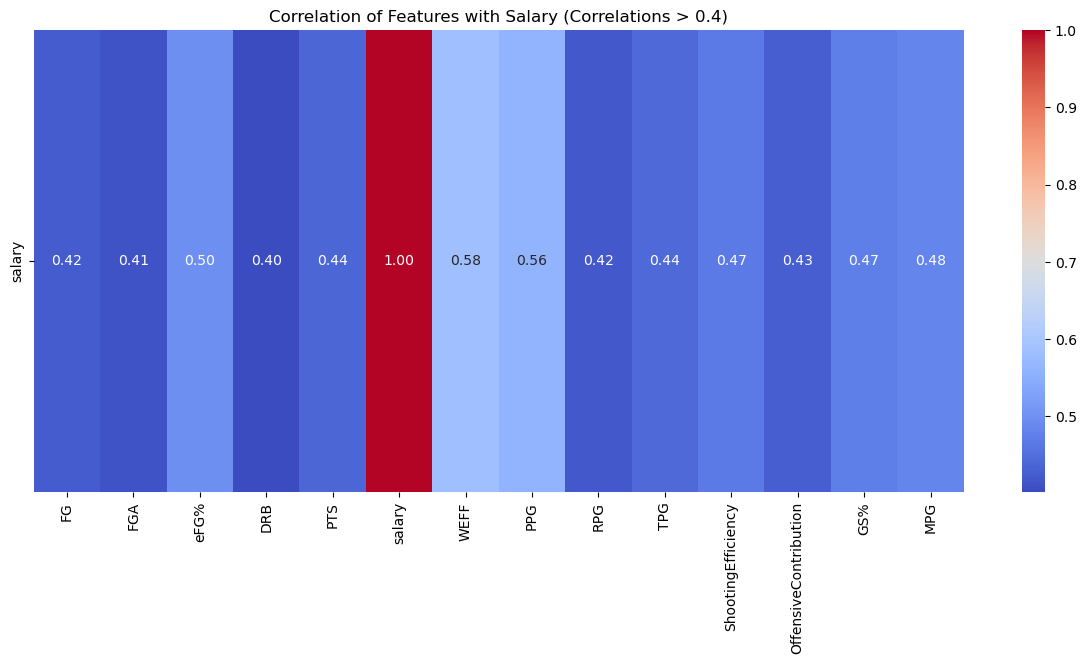

In [20]:
#heatmap that visually represents the correlation between the important selected features from above and salary

import seaborn as sns
import matplotlib.pyplot as plt

columns_of_interest = ['Season', 'Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 
                       'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
                       'salary', 'WEFF', 'PPG', 'APG', 'RPG', 'SPG', 'BPG', 'TPG', 'UsageRate', 'ShootingEfficiency', 
                       'OffensiveContribution', 'DefensiveContribution', 'Experience', 'GS%', 'ImpactScore', 'MPG']

correlation_matrix = df[columns_of_interest].corr()

# Find correlations greater than 0.4 of features with salary
salary_correlation = correlation_matrix['salary'][correlation_matrix['salary'] > 0.4]

salary_correlation_df = salary_correlation.to_frame().T

# Plot the heatmap
plt.figure(figsize=(15, 6))
sns.heatmap(salary_correlation_df, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation of Features with Salary (Correlations > 0.4)")
plt.show()

# We see these features have relatively useful correlation with salary: 'GS', 'FG', 'FGA', 'eFG%', 'DRB', 'PTS', 'WEFF', 'PPG', 'RPG', 'TPG', 'ShootingEfficiency', 'OffensiveContribution','DefensiveContribution', 'GS%', 'MPG'
# This relates to the plots we did before too ; so we will include these in overall model 


In [21]:
df.columns

Index(['Season', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'playerName', 'seasonStartYear', 'salary', 'WEFF', 'PPG', 'APG', 'RPG',
       'SPG', 'BPG', 'TPG', 'UsageRate', 'ShootingEfficiency',
       'OffensiveContribution', 'DefensiveContribution', 'Experience', 'GS%',
       'ImpactScore', 'MPG', 'WEFFRange'],
      dtype='object')

In [22]:
import sqlite3

# Connect to SQLite database
conn = sqlite3.connect('nba_salary_project.db')
cursor = conn.cursor()

# Create the PlayerStats table
cursor.execute('''
CREATE TABLE IF NOT EXISTS PlayerStats (
    id INTEGER PRIMARY KEY,
    Season INTEGER,
    Player TEXT,
    Pos TEXT,
    Age INTEGER,
    Tm TEXT,
    G INTEGER,
    GS INTEGER,
    MP INTEGER,
    FG INTEGER,
    FGA INTEGER,
    FG_perc REAL,
    ThreeP INTEGER,
    ThreePA INTEGER,
    ThreeP_perc REAL,
    TwoP INTEGER,
    TwoPA INTEGER,
    TwoP_perc REAL,
    eFG_perc REAL,
    FT INTEGER,
    FTA INTEGER,
    FT_perc REAL,
    ORB INTEGER,
    DRB INTEGER,
    TRB INTEGER,
    AST INTEGER,
    STL INTEGER,
    BLK INTEGER,
    TOV INTEGER,
    PF INTEGER,
    PTS INTEGER,
    playerName TEXT,
    seasonStartYear INTEGER,
    salary REAL,
    WEFF REAL,
    PPG REAL,
    APG REAL,
    RPG REAL,
    SPG REAL,
    BPG REAL,
    TPG REAL,
    UsageRate REAL,
    ShootingEfficiency REAL,
    OffensiveContribution REAL,
    DefensiveContribution REAL,
    Experience INTEGER,
    GS_perc REAL,
    ImpactScore REAL,
    MPG REAL,
    WEFFRange TEXT,
    EfficiencyTier TEXT
)
''')

conn.commit()
print("Table created successfully.")


Table created successfully.


In [23]:
# Insert the DataFrame into SQLite
df.to_sql('PlayerStats', conn, if_exists='replace', index=False)

print("Data inserted successfully.")


Data inserted successfully.


In [24]:
# Query data from the table
query = "SELECT * FROM PlayerStats LIMIT 10"
df_from_db = pd.read_sql(query, conn)

df_from_db.head()

,Season,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,TPG,UsageRate,ShootingEfficiency,OffensiveContribution,DefensiveContribution,Experience,GS%,ImpactScore,MPG,WEFFRange
0,1990.0,A.C. Green,PF,26.0,LAL,82,82,2709.0,385,806,...,1.41,0.40,0.24,1458.0,566.0,7.0,1.00,0.01,33.04,30-40
1,1991.0,A.C. Green,PF,27.0,LAL,82,21,2164.0,258,542,...,1.21,0.36,0.31,1057.5,397.0,8.0,0.26,0.01,26.39,20-30
2,1992.0,A.C. Green,PF,28.0,LAL,82,53,2902.0,382,803,...,1.35,0.38,0.29,1597.5,583.0,9.0,0.65,0.01,35.39,30-40
3,1993.0,A.C. Green,PF,29.0,LAL,82,55,2819.0,379,706,...,1.41,0.35,0.33,1512.0,551.0,10.0,0.67,0.01,34.38,30-40
4,1994.0,A.C. Green,PF,30.0,PHO,82,55,2825.0,465,926,...,1.22,0.42,0.37,1684.5,586.0,11.0,0.67,0.01,34.45,30-40


In [25]:
#Database Management / SQL Queries:

# Query 1: Average Salary by Age Group
result1 = pd.read_sql_query('''
SELECT Age, AVG(salary) AS avg_salary
FROM PlayerStats
GROUP BY Age
ORDER BY Age;
''', conn)
print("\nQuery 1: Average Salary by Age Group")
print(result1)

# Query 2: Correlation Between Salary and Points Per Game (PPG)
result2 = pd.read_sql_query('''
SELECT PPG, AVG(salary) AS avg_salary
FROM PlayerStats
GROUP BY PPG
ORDER BY PPG DESC;
''', conn)
print("\nQuery 2: Correlation Between Salary and Points Per Game (PPG)")
print(result2)

# Query 3: Top 10 Players with the Highest Salary and their Shooting Efficiency
result3 = pd.read_sql_query('''
SELECT Player, salary, ShootingEfficiency
FROM PlayerStats
ORDER BY salary DESC
LIMIT 10;
''', conn)
print("\nQuery 3: Top 10 Players with the Highest Salary and their Shooting Efficiency")
print(result3)

# Query 4: Salary Comparison to WEFF (Weighted Efficiency)
result4 = pd.read_sql_query('''
SELECT WEFF, AVG(salary) AS avg_salary
FROM PlayerStats
GROUP BY WEFF
ORDER BY WEFF DESC;
''', conn)
print("\nQuery 4: Salary Comparison to WEFF (Weighted Efficiency)")
print(result4)

# Query 5: Impact of Games Started (GS%) on Salary
result5 = pd.read_sql_query('''
SELECT "GS%", AVG(salary) AS avg_salary
FROM PlayerStats
GROUP BY "GS%"
ORDER BY "GS%" DESC;
''', conn)
print("\nQuery 5: Impact of Games Started (GS%) on Salary")
print(result5)

# Query 6: Relationship Between Minutes Per Game (MPG) and Salary
result6 = pd.read_sql_query('''
SELECT MPG, AVG(salary) AS avg_salary
FROM PlayerStats
GROUP BY MPG
ORDER BY MPG DESC;
''', conn)
print("\nQuery 6: Relationship Between Minutes Per Game (MPG) and Salary")
print(result6)

# Query 7: Offensive and Defensive Contribution vs. Salary
result7 = pd.read_sql_query('''
SELECT OffensiveContribution, DefensiveContribution, AVG(salary) AS avg_salary
FROM PlayerStats
GROUP BY OffensiveContribution, DefensiveContribution
ORDER BY avg_salary DESC;
''', conn)
print("\nQuery 7: Offensive and Defensive Contribution vs. Salary")
print(result7)

# Query 8: Total Salary by Season
result8 = pd.read_sql_query('''
SELECT Season, SUM(salary) AS total_salary
FROM PlayerStats
GROUP BY Season
ORDER BY Season ASC;
''', conn)
print("\nQuery 8: Total Salary by Season")
print(result8)

# Query 9: Average Salary and Efficiency by Age Group
# This query analyzes average salary and efficiency (WEFF) across different age groups.
result9 = pd.read_sql('''
SELECT 
    CASE
        WHEN Age BETWEEN 18 AND 24 THEN '18-24'
        WHEN Age BETWEEN 25 AND 30 THEN '25-30'
        WHEN Age BETWEEN 31 AND 35 THEN '31-35'
        ELSE '36+'
    END AS AgeGroup,
    AVG(salary) AS AverageSalary,
    AVG(WEFF) AS AverageEfficiency
FROM PlayerStats
GROUP BY AgeGroup
ORDER BY AverageSalary DESC;
''', conn)
print("\nQuery 9: Average Salary and Efficiency by Age Group")
print(result9)

# Query 10: Relationship Between Turnovers Per Game (TPG) and Salary
result10 = pd.read_sql_query('''
SELECT TPG, AVG(salary) AS avg_salary,
       COUNT(Player) AS player_count
FROM PlayerStats
GROUP BY TPG
ORDER BY avg_salary DESC;
''', conn)
print("\nQuery 10: Relationship Between Turnovers Per Game (TPG) and Salary")
print(result10)

# Query 11: Correlation Between Age and Shooting Efficiency
result11 = pd.read_sql_query('''
SELECT Age,
       AVG(ShootingEfficiency) AS avg_efficiency,
       AVG(salary) AS avg_salary,
       COUNT(Player) AS player_count
FROM PlayerStats
GROUP BY Age
HAVING COUNT(Player) > 5
ORDER BY Age;
''', conn)
print("\nQuery 11: Correlation Between Age and Shooting Efficiency")
print(result11)

# Query 12: Salary vs eFG% (Effective Field Goal Percentage)
result12 = pd.read_sql('''
SELECT 
    "eFG%" AS EffectiveFieldGoalPercentage,
    AVG(salary) AS AverageSalary
FROM PlayerStats
GROUP BY "eFG%"
ORDER BY "eFG%" ASC;
''', conn)
print("\nQuery 12: Salary vs eFG% (Effective Field Goal Percentage)")
print(result5)


# Query 13: Players with Exceptional Offensive Efficiency
percentile_90 = df['OffensiveContribution'].quantile(0.9)

# Use the calculated percentile in the SQL query
result13 = pd.read_sql_query(f'''
SELECT Player, OffensiveContribution, salary
FROM PlayerStats
WHERE OffensiveContribution > {percentile_90}
ORDER BY salary DESC;
''', conn)

print("\nQuery 13: Players with Exceptional Offensive Efficiency")
print(result13)

# Query 14: Age and Salary Tier Distribution
result14 = pd.read_sql_query('''
SELECT Age,
       CASE
           WHEN salary < 1000000 THEN 'Low'
           WHEN salary BETWEEN 1000000 AND 5000000 THEN 'Medium'
           WHEN salary > 5000000 THEN 'High'
       END AS salary_tier,
       COUNT(Player) AS player_count
FROM PlayerStats
GROUP BY Age, salary_tier
ORDER BY Age, salary_tier;
''', conn)
print("\nQuery 14: Age and Salary Tier Distribution")
print(result14)

# Query 15: Players' Scoring Efficiency vs Salary Comparison
result15 = pd.read_sql_query('''
SELECT Player, salary,
       CASE
           WHEN "eFG%" > 0.6 THEN 'High Efficiency'
           WHEN "eFG%" BETWEEN 0.4 AND 0.6 THEN 'Medium Efficiency'
           ELSE 'Low Efficiency'
       END AS efficiency_category
FROM PlayerStats
ORDER BY efficiency_category, salary DESC;
''', conn)

print("\nQuery 15: Players' Scoring Efficiency vs Salary Comparison")
print(result15)


# Close the database connection
conn.close()



# Query 1: Calculates the average salary by age group.
# It shows how salary varies across different age brackets.

# Query 2: Calculates average salary based on points per game (PPG).
# It shows the relationship between scoring ability and salary.

# Query 3: Retrieves the top 10 players with the highest salaries and their shooting efficiency.
# It shows the efficiency metrics of the highest-paid players.

# Query 4: Compares salary to WEFF (Weighted Efficiency).
# It shows how efficiency impacts average salary.

# Query 5: Analyzes the impact of games started (GS%) on salary.
# It shows whether starting games influences player earnings.

# Query 6: Examines the relationship between minutes per game (MPG) and salary.
# It shows how playing time correlates with salary.

# Query 7: Analyzes offensive and defensive contributions versus salary.
# It shows the contribution types that command higher salaries.

# Query 8: Calculates total salary by season.
# It shows salary trends across seasons.

# Query 9: Analyzes average salary and efficiency (WEFF) by age group.
# It shows how age influences salary and performance efficiency.

# Query 10: Examines the relationship between turnovers per game (TPG) and salary.
# It shows whether limiting turnovers affects player salaries.

# Query 11: Calculates the correlation between age and shooting efficiency.
# It shows how efficiency and salary change with age.

# Query 12: Investigates the relationship between effective field goal percentage (eFG%) and salary.
# It shows if better shooting efficiency is rewarded with higher salaries.

# Query 13: Identifies players with exceptional offensive efficiency (top 10%).
# It shows the salaries of the most offensively efficient players.

# Query 14: Groups players by age and salary tiers.
# It shows the distribution of salary levels across age groups.

# Query 15: Compares players' scoring efficiency categories with their salaries.
# It shows if scoring efficiency influences salary tiers.



Query 1: Average Salary by Age Group
     Age    avg_salary
0   18.0  1.231681e+06
1   19.0  3.102774e+06
2   20.0  2.781668e+06
3   21.0  2.510537e+06
4   22.0  2.620775e+06
5   23.0  2.937011e+06
6   24.0  3.399346e+06
7   25.0  4.018313e+06
8   26.0  5.227425e+06
9   27.0  5.031670e+06
10  28.0  5.566513e+06
11  29.0  5.871611e+06
12  30.0  5.872135e+06
13  31.0  6.190375e+06
14  32.0  5.914632e+06
15  33.0  5.270169e+06
16  34.0  5.015240e+06
17  35.0  4.426321e+06
18  36.0  4.399922e+06
19  37.0  3.342622e+06
20  38.0  2.889568e+06
21  39.0  2.853830e+06
22  40.0  1.723074e+06
23  41.0  1.747094e+06
24  42.0  1.782376e+06
25  43.0  1.150000e+06

Query 2: Correlation Between Salary and Points Per Game (PPG)
        PPG    avg_salary
0     31.38  1.237500e+07
1     31.30  3.372420e+07
2     31.20  1.901250e+07
3     30.54  2.875177e+07
4     29.87  3.500000e+06
...     ...           ...
2265   0.29  2.900000e+06
2266   0.25  3.109080e+05
2267   0.22  2.500000e+04
2268   0.20  1.320

In [26]:
# REGRESSION

# Define the target variable and features (the ones we found were good from the plots, correlation, and sql queries)

selected_columns = [
    'Season', 'Tm', 'Age', 'GS', 'FG', 'FGA', 'eFG%',
    'WEFF', 'PPG', 'RPG', 'TPG', 'APG',
    'ShootingEfficiency', 'OffensiveContribution',
    'DefensiveContribution', 'GS%', 'MPG'
]
X = df[selected_columns]  # Use only the specified columns for features
y = df['salary']  # Use Salary as the target

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Define transformations for each column type
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical columns
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Scale numerical columns
])

# Combine transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
df.columns

Index(['Season', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'playerName', 'seasonStartYear', 'salary', 'WEFF', 'PPG', 'APG', 'RPG',
       'SPG', 'BPG', 'TPG', 'UsageRate', 'ShootingEfficiency',
       'OffensiveContribution', 'DefensiveContribution', 'Experience', 'GS%',
       'ImpactScore', 'MPG', 'WEFFRange'],
      dtype='object')

In [28]:
#linear Regression Model

from sklearn.linear_model import LinearRegression

# Create a pipeline with Linear Regression
linear_reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train the model
linear_reg_pipeline.fit(X_train, y_train)

# Make predictions
y_pred = linear_reg_pipeline.predict(X_test)

# Evaluation
print("Linear Regression Results")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R² score:", r2_score(y_test, y_pred))


Linear Regression Results
Mean Absolute Error (MAE): 2427105.882577202
Mean Squared Error (MSE): 10571074446937.521
R² score: 0.6467994590166957


In [29]:
#Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor

# Create a pipeline with Decision Tree Regressor
decision_tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

# Train the model
decision_tree_pipeline.fit(X_train, y_train)

# Make predictions
y_pred = decision_tree_pipeline.predict(X_test)

# Evaluation
print("Decision Tree Results")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R² score:", r2_score(y_test, y_pred))


Decision Tree Results
Mean Absolute Error (MAE): 1640959.0289744567
Mean Squared Error (MSE): 7188092715569.967
R² score: 0.7598315811205953


In [30]:
#Random Forest Model
from sklearn.ensemble import RandomForestRegressor

# Create a pipeline with Random Forest Regressor
random_forest_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42, n_estimators=10))
])

# Train the model
random_forest_pipeline.fit(X_train, y_train)

# Make predictions
y_pred = random_forest_pipeline.predict(X_test)

# Evaluation
print("Random Forest Results")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R² score:", r2_score(y_test, y_pred))


Random Forest Results
Mean Absolute Error (MAE): 1259028.0695768204
Mean Squared Error (MSE): 3778805494976.6465
R² score: 0.8737426217367057


In [31]:
# Find the ranges of all the numerical columns (to get some bounds on the dashboard we make)

def summarize_numerical_columns(data, numerical_cols):
    summary = {}
    for col in numerical_cols:
        summary[col] = {
            "min": data[col].min(),
            "max": data[col].max()
        }
    return summary

# Summarize numerical columns in X_train
numerical_summary = summarize_numerical_columns(X_train, numerical_cols)

numerical_summary_df = pd.DataFrame.from_dict(numerical_summary, orient="index")

print(numerical_summary_df)


                            min       max
Season                 1990.000  2021.000
Age                      18.000    43.000
GS                        0.000    83.000
FG                        0.000   830.000
FGA                       0.000  1724.000
eFG%                      0.001     0.803
WEFF                     -1.000    71.870
PPG                       0.000    31.380
RPG                       0.000    16.330
TPG                       0.000     5.670
APG                       0.000    12.750
ShootingEfficiency        0.060     0.780
OffensiveContribution     0.000  3041.500
DefensiveContribution     0.000   973.000
GS%                       0.000     1.000
MPG                       0.000    43.700


In [32]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from ipywidgets import widgets, interactive, VBox, HBox, Layout

# We create an interactive dashboard using ipywidgets, allowing users to input values for player features (via sliders and text fields) and predict their salary using a pre-trained RandomForestRegressor model when a button is clicked.

# Pre-trained model setup (using the existing pipeline and preprocessor from our best model - RandomForestRegressor model)
random_forest_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor), 
    ('regressor', RandomForestRegressor(random_state=42, n_estimators=10)) 
])

random_forest_pipeline.fit(X_train, y_train)

# Descriptive labels for sliders
descriptive_labels = {
    "Season": "Season Start Year",
    "Tm": "Team",
    "Age": "Player's Age",
    "GS": "Games Started",
    "FG": "Field Goals Made",
    "FGA": "Field Goal Attempts",
    "eFG%": "Effective Field Goal Percentage",
    "WEFF": "Weighted Efficiency",
    "PPG": "Points Per Game",
    "RPG": "Rebounds Per Game",
    "TPG": "Turnovers Per Game",
    "APG": "Assists Per Game",
    "ShootingEfficiency": "Shooting Efficiency",
    "OffensiveContribution": "Offensive Contribution",
    "DefensiveContribution": "Defensive Contribution",
    "GS%": "Games Started Percentage",
    "MPG": "Minutes Per Game"
}

# Creates input widgets (sliders and text fields) for each feature, based on the feature's data type and range
inputs = {}
for col in X_train.columns:
    slider_layout = Layout(width='300px') 
    if col in numerical_cols:
        if col == "Season" or col == "seasonStartYear":
            inputs[col] = widgets.IntSlider(
                min=1990, max=2030, step=1, layout=slider_layout
            )
        elif col == "Age":
            inputs[col] = widgets.IntSlider(
                min=18, max=50, step=1, layout=slider_layout
            )
        elif col == "GS":
            inputs[col] = widgets.IntSlider(
                min=0, max=82, step=1, layout=slider_layout
            )
        elif col == "MPG":
            inputs[col] = widgets.FloatSlider(
                min=0, max=48, step=0.1, layout=slider_layout
            )
        elif col in ["FG", "FGA"]:
            min_value = X_train[col].min()
            max_value = X_train[col].max()
            if min_value == max_value: 
                min_value = 0
                max_value = 1
            inputs[col] = widgets.IntSlider(
                min=min_value, max=max_value, step=(max_value - min_value) / 100, layout=slider_layout
            )
        elif col in ["PPG", "RPG", "APG", "TPG", "WEFF", "ShootingEfficiency"]:
            # Dynamically determine min and max
            min_value = X_train[col].min()
            max_value = X_train[col].max()
            if min_value == max_value:  # Handle invalid range
                min_value = 0
                max_value = 1
            inputs[col] = widgets.FloatSlider(
                min=min_value, max=max_value, step=(max_value - min_value) / 100, layout=slider_layout
            )
        elif col in ["eFG%", "GS%"]:
            inputs[col] = widgets.FloatSlider(
                min=0, max=1.0, step=0.01, layout=slider_layout
            )
        else:
            inputs[col] = widgets.FloatSlider(
                min=0, max=X_train[col].max() * 1.2, step=1, layout=slider_layout
            )
    elif col in categorical_cols:
        inputs[col] = widgets.Text()

sliders_with_labels = []
for col, slider in inputs.items():
    label = widgets.Label(value=descriptive_labels.get(col, col))
    sliders_with_labels.append(VBox([label, slider], layout=Layout(margin="10px 0")))

# Button and output widget
button = widgets.Button(description="Predict Salary")
output = widgets.Output()

# Function to predict salary
def on_button_click(b):
    with output:
        output.clear_output()
        try:
            # Get the input values
            input_data = pd.DataFrame([{k: w.value for k, w in inputs.items()}])
            # Predict salary using the model
            prediction = random_forest_pipeline.predict(input_data)[0]
            print(f"Predicted Salary: ${prediction:,.2f}")
        except Exception as e:
            print(f"Error: {e}")

button.on_click(on_button_click)

# Display widgets
VBox([VBox(sliders_with_labels), button, output])

In [33]:
##
#df
